# Practical example
- predicting price of used cars depending on their specifications
- Features: Brand, Mileage, EngineV, Year

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [130]:
raw = pd.read_csv('C:/Users/tomas/OneDrive/Plocha/CarPricePredictions/CarPricePrediction.csv')

raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- 'Model' has 312 unique values, which is hard to implement for regression

### Dealing with missing values

In [6]:
raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

- we can safely drop the missing values since it accoutns for less than 5% of the data

In [131]:
raw = raw.dropna(axis=0)

In [132]:
raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs
- PDF often helps us to spot anomalies and decide whether we want to transform a feature

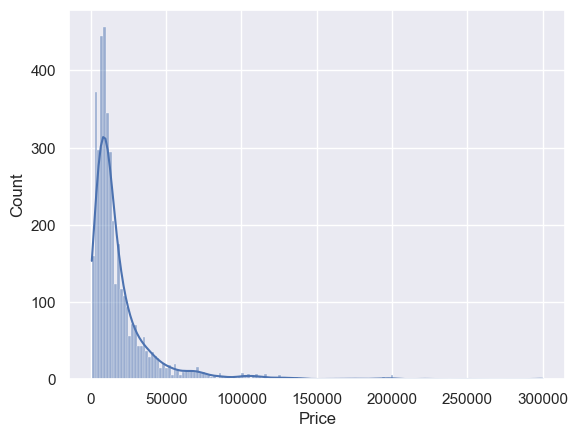

In [12]:
sns.histplot(raw['Price'], kde=True);

- 'Price' is not normally distributed and has a problem with outliers

### Dealing with outliers

In [133]:
q = raw['Price'].quantile(0.99)

raw = raw[raw['Price']<q]

raw['Price'].describe()

count      3984.000000
mean      17837.117460
std       18976.268315
min         600.000000
25%        6980.000000
50%       11400.000000
75%       21000.000000
max      129222.000000
Name: Price, dtype: float64

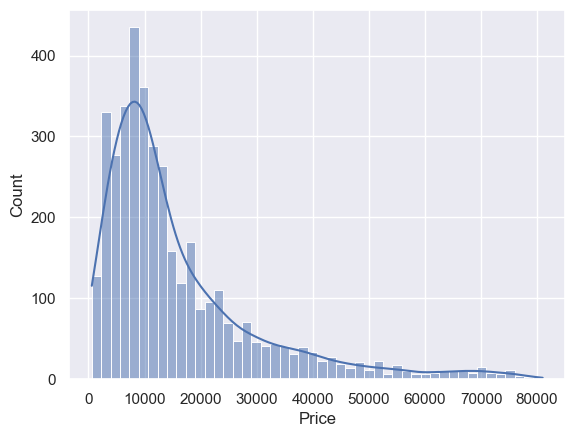

In [17]:
sns.histplot(raw['Price'], kde=True);

In [65]:
raw['Price'].skew()

2.652472167087331

- we can see that the distribution has not change, but we eliminated the outliers

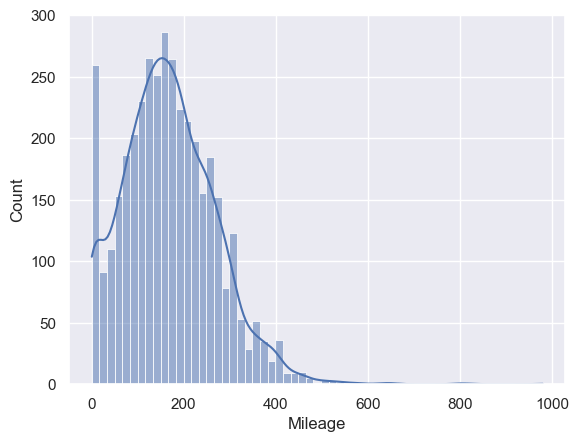

In [18]:
sns.histplot(raw['Mileage'], kde=True);

In [134]:
q = raw['Mileage'].quantile(0.99)
raw = raw[raw['Mileage']<q]

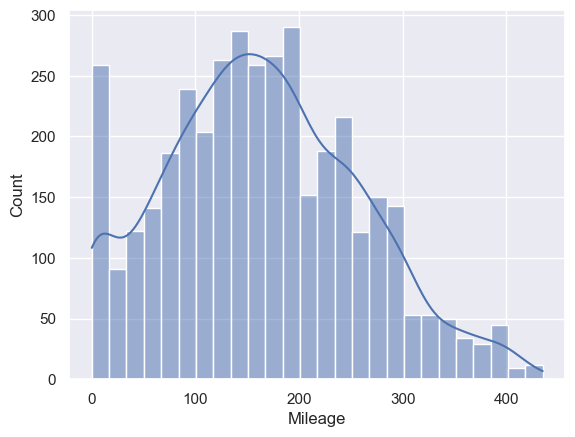

In [20]:
sns.histplot(raw['Mileage'], kde=True);

In [55]:
raw['Mileage'].skew()

0.2817161109764247

In [21]:
raw['Mileage'].describe()

count    3862.000000
mean      164.706629
std        94.400869
min         0.000000
25%        97.000000
50%       160.000000
75%       230.000000
max       435.000000
Name: Mileage, dtype: float64

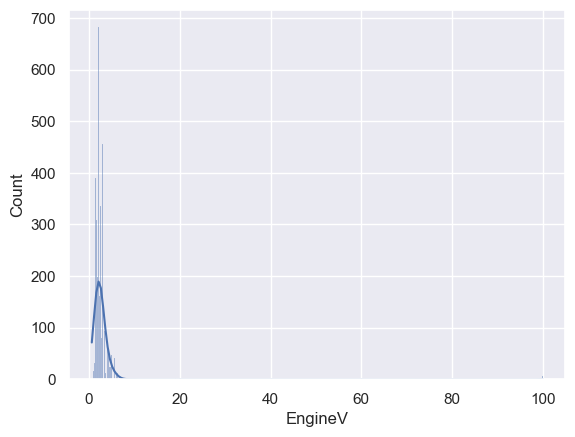

In [22]:
sns.histplot(raw['EngineV'], kde=True);

- A Google search found out that car engine volumes are always bellow 6.5l
    - we can then remove the entries that are above this value

In [135]:
raw = raw[raw['EngineV']<6.5]

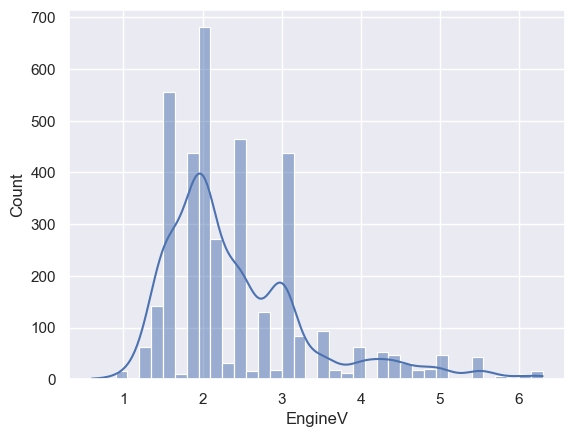

In [25]:
sns.histplot(raw['EngineV'], kde=True);

In [68]:
raw['EngineV'].skew()

1.4901525808529255

- should I treat this one as categorical variable?

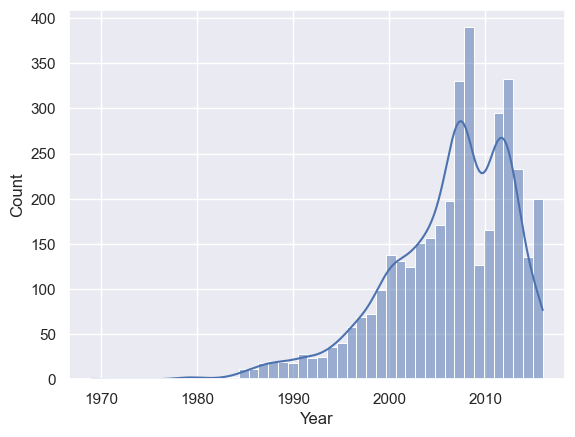

In [26]:
sns.histplot(raw['Year'], kde=True);

In [136]:
q = raw['Year'].quantile(0.01)
raw = raw[raw['Year']>q]

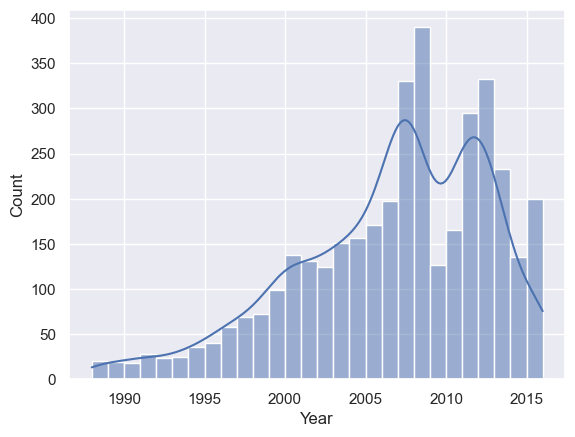

In [29]:
sns.histplot(raw['Year'], kde=True);

In [57]:
raw['Year'].skew()

-0.7338239289752201

#### Transforming 'EngineV' to categorical

In [35]:
raw['EngineV'].describe()

count    3785.000000
mean        2.430560
std         0.941703
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max         6.300000
Name: EngineV, dtype: float64

<AxesSubplot:>

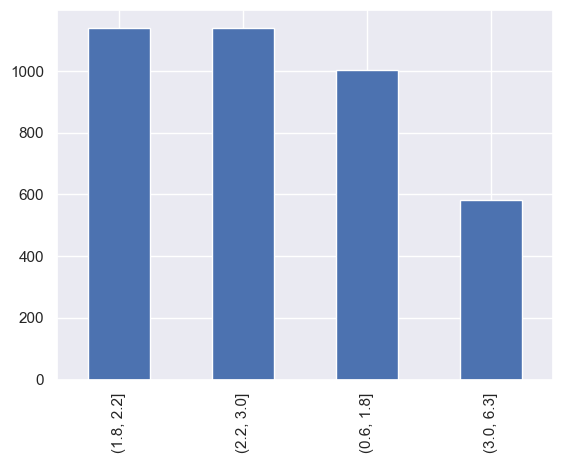

In [137]:
bins = [0.6, 1.8, 2.2, 3, 6.3]
bins_EngineV = pd.cut(raw['EngineV'], bins)
bins_EngineV.value_counts().plot(kind='bar')

In [139]:
raw['bins_EngineV'] = bins_EngineV

In [43]:
raw = raw.drop('EngineV', axis=1)

#### Fixing wrong indexing
- due to removing observations

In [140]:
raw = raw.reset_index(drop=True)

In [141]:
raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867,3866
unique,7,NaN,6,NaN,NaN,4,2,NaN,291,4
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,"(1.8, 2.2]"
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181,1141
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN,NaN


## Checking the OLS assumptions
- we do not need to care about the categorical variables as they will be converted to dummies

### Linearity

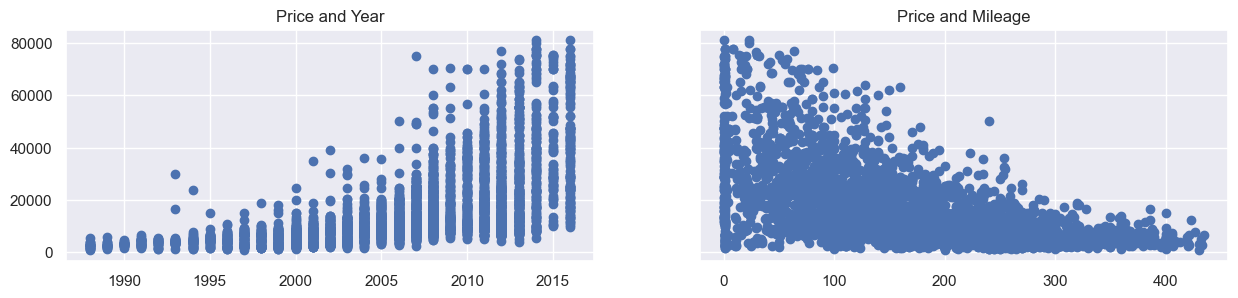

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(raw['Year'],raw['Price'])
ax1.set_title('Price and Year')
ax2.scatter(raw['Mileage'],raw['Price'])
ax2.set_title('Price and Mileage')

plt.show()

# we can sport patterns, but definitely not linear ones
    # we cannot run MLR like this, this have to transform one or more variables

- both numerical features do not exhibit linearity patterns
    - we need to transform one or more variables to be able to run MLR

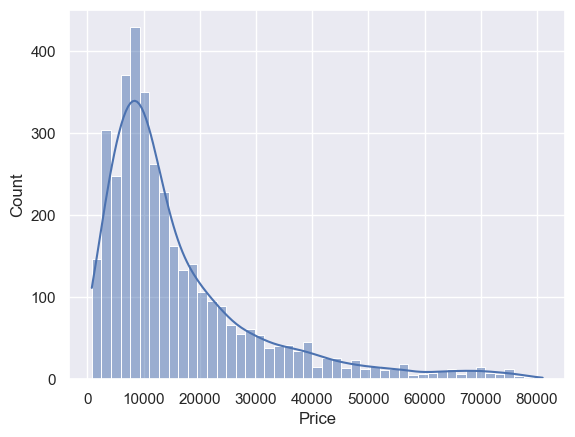

In [48]:
sns.histplot(raw['Price'], kde=True);

- 'Price' is exponentially distributed which is why the relationships with numerical features are not linear
    - we can transform 'Price' using logarithm

### Relaxing the assumptions
- log transformation of Price to achieve linear relationship
    - log transformations are especially useful when facing exponential relationships

In [142]:
log_price = np.log(raw['Price'])

raw['log_price'] = log_price
raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,"(1.8, 2.2]",8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,"(2.2, 3.0]",8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,"(3.0, 6.3]",9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,"(3.0, 6.3]",10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,"(1.8, 2.2]",9.814656


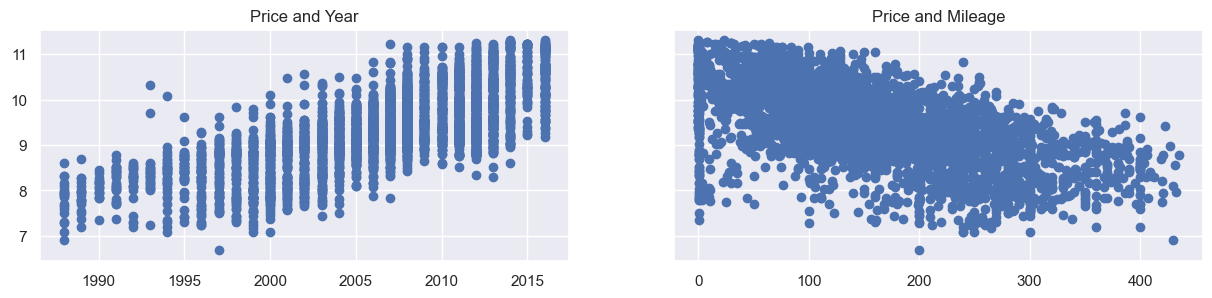

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(raw['Year'],raw['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(raw['Mileage'],raw['log_price'])
ax2.set_title('Price and Mileage')

plt.show()

- now we can see linear relationships

In [52]:
raw = raw.drop(['Price'],axis=1)

In [53]:
raw.head()

,Brand,Body,Mileage,Engine Type,Registration,Year,Model,bins_EngineV,log_price
0,BMW,sedan,277,Petrol,yes,1991,320,"(1.8, 2.2]",8.342840
1,Mercedes-Benz,van,427,Diesel,yes,1999,Sprinter 212,"(2.2, 3.0]",8.974618
2,Mercedes-Benz,sedan,358,Gas,yes,2003,S 500,"(3.0, 6.3]",9.495519
3,Audi,crossover,240,Petrol,yes,2007,Q7,"(3.0, 6.3]",10.043249
4,Toyota,crossover,120,Petrol,yes,2011,Rav 4,"(1.8, 2.2]",9.814656


### Endogeneity
- there are tests to test it or we can check it manually
- this dataset is fine so we do not worry about it now but we will check it after the regression

### Normality and Homoscedasticity
- Normality is assumed for a big sample (Central Limit Theorem)
- Zero mean - we discussed already
- Homoscedasticity - generally holds as we can see from the scatter plots (because we already implemented a log transformation for y)
    - I can also use the White and Beusch-Pagan test
    - log transformation is the most common fix for heteroscedasticity

In [58]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [143]:
model = ols(formula='log_price~Mileage', data=raw).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stats', 'LM p', 'F stats', 'F p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df

,LM stats,LM p,F stats,F p
White,201.581586,1.686998e-44,106.251342,1.201744e-45
Breusch-Pagan,105.557040,9.220517e-25,108.463152,4.553158e-25


In [144]:
model = ols(formula='log_price~Year', data=raw).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stats', 'LM p', 'F stats', 'F p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df

,LM stats,LM p,F stats,F p
White,144.850618,3.516316e-32,75.185428,9.262299e-33
Breusch-Pagan,56.677032,5.135993e-14,57.490332,4.228070e-14


- both numerical variables are heteroskedastic, not sure what to do

### Autocorrelation
- the observations that we have are not coming from time series data or panel data
- each row comes from a different customer, so logicaly there is no reason for the observations to be dependent on each other

### Multicollinearity
- the best way to check for multicollinearity is through VIF (Variance Inflation Factor)
- VIF = 1 - no multicollinearity
- 1 < VIF < 5 - perfectly ok
- VIF > 5/6/10 - unacceptable
    - there is no consensus

In [145]:
raw.columns.values

# we can expect a correlation between Year and Mileage

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'bins_EngineV', 'log_price'],
      dtype=object)

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = raw[['Mileage', 'Year']]

vif = pd.DataFrame()
 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [88]:
vif

,VIF,Features
0,3.791089,Mileage
1,3.791089,Year


- Both numerical variables are fine

## Create dummy variables

#### Aggregating 'Model'
- 'Model' has 312 unique values making it a feature with high cardinality
- we can reduce the cardinality by setting a threshold and aggregate the values
    - we will keep the unique categories within the threshold and the rest will be labeled as 'Other'

In [147]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.25,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


#Call the function with a default threshold of 75%
transformed_column,new_category_list=cumulatively_categorise(raw['Model'],return_categories_list=True)

In [148]:
transformed_column.value_counts()

Other      2900
E-Class     181
Vito        154
A6          153
Kangoo      132
Camry       127
X5          110
Caddy       110
Name: Model, dtype: int64

In [149]:
raw['aggreg_model'] = transformed_column
raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV,log_price,aggreg_model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,"(1.8, 2.2]",8.342840,Other
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,"(2.2, 3.0]",8.974618,Other
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,"(3.0, 6.3]",9.495519,Other
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,"(3.0, 6.3]",10.043249,Other
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,"(1.8, 2.2]",9.814656,Other


In [150]:
df = raw.copy()

In [153]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV,log_price,aggreg_model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867,3866,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291,4,NaN,8
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,"(1.8, 2.2]",NaN,Other
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181,1141,NaN,2900
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN,NaN,9.415703,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN,NaN,0.876616,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,NaN,6.684612,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN,NaN,8.881836,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN,NaN,9.367344,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN,NaN,9.985068,NaN


In [154]:
df = df.drop(['Price', 'EngineV', 'Model'], axis=1)

In [157]:
df.describe(include='all')

,Brand,Body,Mileage,Engine Type,Registration,Year,bins_EngineV,log_price,aggreg_model
count,3867,3867,3867.000000,3867,3867,3867.000000,3866,3867.000000,3867
unique,7,6,NaN,4,2,NaN,4,NaN,8
top,Volkswagen,sedan,NaN,Diesel,yes,NaN,"(1.8, 2.2]",NaN,Other
freq,848,1467,NaN,1807,3505,NaN,1141,NaN,2900
mean,NaN,NaN,160.542539,NaN,NaN,2006.709853,NaN,9.415703,NaN
std,NaN,NaN,95.633291,NaN,NaN,6.103870,NaN,0.876616,NaN
min,NaN,NaN,0.000000,NaN,NaN,1988.000000,NaN,6.684612,NaN
25%,NaN,NaN,91.000000,NaN,NaN,2003.000000,NaN,8.881836,NaN
50%,NaN,NaN,157.000000,NaN,NaN,2008.000000,NaN,9.367344,NaN
75%,NaN,NaN,225.000000,NaN,NaN,2012.000000,NaN,9.985068,NaN


In [158]:
df = pd.get_dummies(df, drop_first=True)

In [159]:
# Here's the result
df.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,"bins_EngineV_(1.8, 2.2]","bins_EngineV_(2.2, 3.0]","bins_EngineV_(3.0, 6.3]",aggreg_model_Caddy,aggreg_model_Camry,aggreg_model_E-Class,aggreg_model_Kangoo,aggreg_model_Other,aggreg_model_Vito,aggreg_model_X5
0,277,1991,8.342840,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,427,1999,8.974618,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,358,2003,9.495519,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,240,2007,10.043249,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,120,2011,9.814656,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


### Rearrange a bit

In [49]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [50]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: DEPENDENT VARIABLE, INDEPENDENT NUMERICAL VARIABLES, DUMMIES
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [51]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [52]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data
- it is not usually recommended to standardize dummy variables
    - some practitioners would be strongly against it
    - in ML, we do not care that much as scaling has no effect on the predictive power of dummies, once scaled, though, they lose all their dummy meaning
    - in the future, we will learn to make a custom scaler scaling only numerical valuables and leaving dummies unchanged

In [53]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [54]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [56]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [58]:
# Create a linear regression object
    # in fact, this is a log-linear regression, as our DV is the log of Price
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [59]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

#### 1st check - Scatterplot of train target and predictions

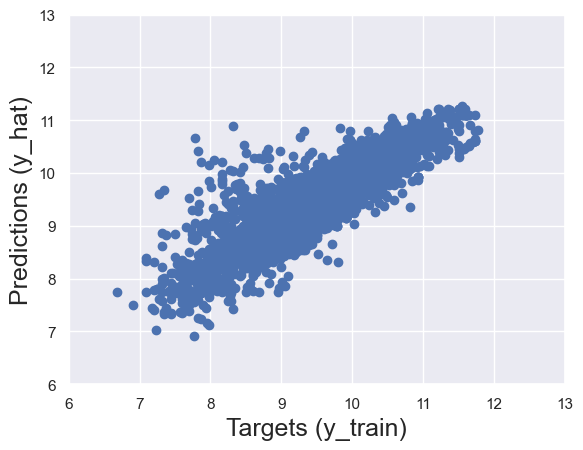

In [61]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-DEGREE LINE, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### 2nd check - Residual plot

C:\Users\tomas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


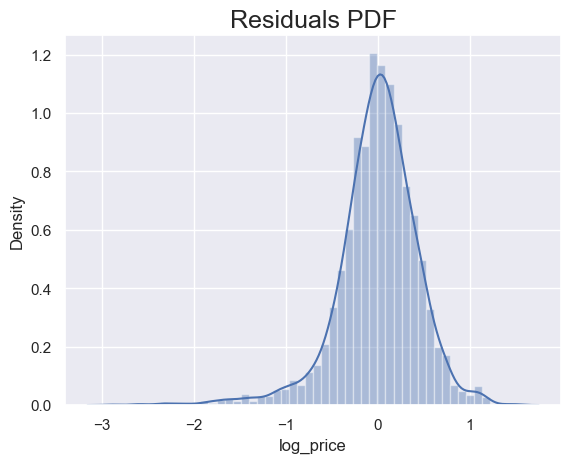

In [64]:
# Residuals - the difference between target and prediction
    # - the estimate of error

# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

plt.show()

# frpm the regression assumptions, we know that:
    # the error must be normaly distributed with the mean of 0 (and residuals are the estimates of errors)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets) (the model overestimated the target)
# This is food for thought to improve our model

In [65]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.744996578792662

In [66]:
# Calculating R-squared adjusted

r2 = reg.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n - 1)/(n-p-1)

adjusted_r2

0.7435868037811093

### Finding the weights and bias

In [67]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.415239458021299

In [68]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [70]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(data=(inputs.columns.values), columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [71]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### Weights interpretation
##### Constinuous variables
- a POSITIVE WIEGHT shows that as a feature increases in value, so do the log_price and Prrce respectively
- a NEGATIVE WEIGHT shows that as a feature increases in value, log_price and Price decrease
##### Dummy variables
- a POSITIVE WIEGHT shows that the respective category (ex. Brand) is more expensive than the benchamrk (Audi)
- a NEGATIVE WEIGHT shows that the respective category (ex. Brand) is less expensive than the benchamrk (Audi)
    - benchmark is the category within group that is not shown as a dummy (not visible in the reg_summary dataframe)

##### Notes
- bigger the weight, bigger the impact
- it does not make sense to compare continuous varibles with dummies

## Testing

In [72]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

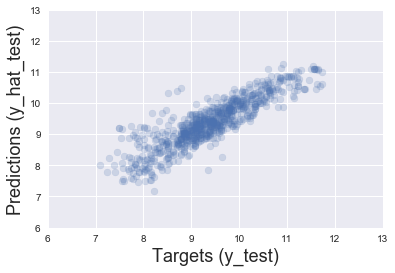

In [51]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# we can see that our model is much more better in predicting higher prices, lower prices are mch more scattered

In [74]:
# Finally, let's manually check these predictions
    # it is unconvential to check predictions manually
# To obtain the actual prices, we take the exponential of the log_price
# df_pf stand for dataframe performance
# log is the opposite of exponential!!!

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [75]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [76]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [77]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [78]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [81]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
    # it is irrelevant whether an observation is off by +1% or -1%
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [82]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

# we got relatively close in the percentiels but the maximum is way off

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [83]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

# we can scroll down and we will see that the biggest problem is with target values that are extremely low
    # residuals for these values are negative, meaning that the predictions are higher than the target
    # we might be missing some important factor that drives the price of used cars lower

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


### How to improve our model
- use a different set of variables
- remove a bigger part of the outliers
- use different kinds of transformations

- it can take mongths or years to develop a truly good model!!!